<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1> Titanic Analysis and Logistic Regression Project</h1>
</div>

<img src="./img/titanic.jpg" style="width:900px;height:400px"/>
<!-- [Image Source](https://www.theschoolrun.com/homework-help/titanic) -->

# Table of Contents

[1. Introduction](#1)<br>
[2. Import Libraries](#2)<br>
[3. Exploratory Data Analysis (EDA)](#3)<br>
[4. Data Cleaning](#4)<br>
[5. Machine Learning Model](#5)<br>
[6. Conclusion](#6)<br>

# Introduction<a id='1'></a>

The RMS Titanic, a luxury steamship, sank in the early hours of April 15, 1912, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,240 passengers and crew on board, more than 1,500 lost their lives in the disaster.

For this project, I will be exploring the titanic dataset and creating a machine learning model to support my Research Goal.

**Research Goal: I would like to classify passengers of the titanic dataset to see if there is a way to predict who would have survived.**

# Import Libraries<a id='2'></a>

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#library for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Exploratory Data Analysis<a id='3'></a>

Read the dataset (located at `../datasets/titanic.csv`) and do some exploratory analysis and data cleansing.

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Column information is as follows:
<table>
  <tr>
    <th>variable</th>
    <th>definition</th>
    <th>key</th>
  </tr>
  <tr>
    <td>PassengerID</td>
    <td>ID given to passenger</td>
    <td></td>
  </tr>
  <tr>
    <td>Survived</td>
    <td>indicator if passenger survived</td>
    <td>0 = No, 1 = Yes</td>
  </tr>
  <tr>
    <td>Pclass</td>
    <td>Ticket Class</td>
    <td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
  </tr>
  <tr>
    <td>Sex</td>
    <td>sex of passenger</td>
    <td></td>
  </tr>
  <tr>
    <td>Age</td>
    <td>age of passenger in years</td>
    <td></td>
  </tr>
  <tr>
    <td>Sibsp</td>
    <td># of passenger's siblings/spouses aboard</td>
    <td></td>
  </tr>
  <tr>
    <td>Parch</td>
    <td># of passenger's parents/children aboard</td>
    <td></td>
  </tr>
  <tr>
    <td>Ticket</td>
    <td>ticket number</td>
    <td></td>
  </tr>
  <tr>
    <td>Fare</td>
    <td>fare paid by passenger</td>
    <td></td>
  </tr>
  <tr>
    <td>Cabin</td>
    <td>cabin number</td>
    <td></td>
  </tr>
  <tr>
    <td>Embarked</td>
    <td>port of embarkation</td>
    <td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
  </tr>
</table>

### Things to consider when doing exploratory analysis.

#### 1. Shape of the dataset

In [4]:
df.shape

(891, 12)

#### 2. Mean and median values for different columns

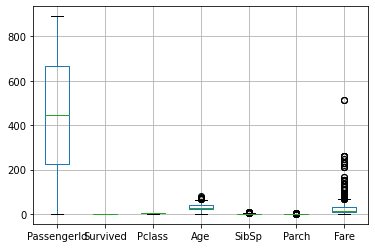

In [5]:
df.boxplot()

#### 3. Distribution of the data

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96b147d1f0>,
      dtype=object)

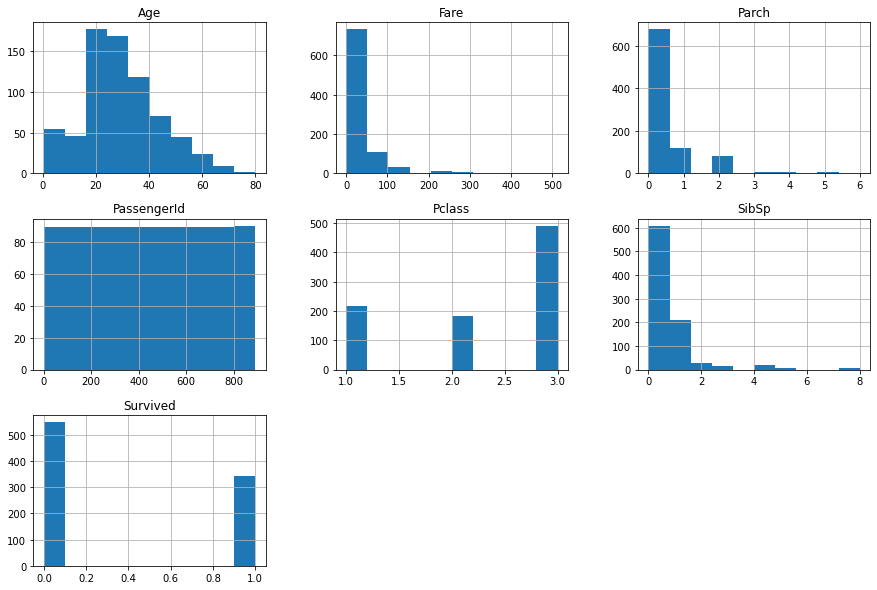

In [7]:
df.hist(figsize= (15,10))

#### 4. Total numbers for different categories for columns. For columns with nominal data, how many different categories are there?

In [11]:
columns = df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
def see_possible_categories(col):
    return df.groupby(col).sum()
    
for col in columns:
    print(see_possible_categories(col))

             Survived  Pclass   Age  SibSp  Parch     Fare
PassengerId                                               
1                   0       3  22.0      1      0   7.2500
2                   1       1  38.0      1      0  71.2833
3                   1       3  26.0      0      0   7.9250
4                   1       1  35.0      1      0  53.1000
5                   0       3  35.0      0      0   8.0500
...               ...     ...   ...    ...    ...      ...
887                 0       2  27.0      0      0  13.0000
888                 1       1  19.0      0      0  30.0000
889                 0       3   0.0      1      2  23.4500
890                 1       1  26.0      0      0  30.0000
891                 0       3  32.0      0      0   7.7500

[891 rows x 6 columns]
          PassengerId  Pclass       Age  SibSp  Parch        Fare
Survived                                                         
0              245412    1390  12985.50    304    181  12142.7199
1          

# Data Cleaning<a id='4'></a>

### Things to consider when data cleansing: 

#### 1. How many missing entries are in our dataset?

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 2. * For rows missing data, is there a way we can fill in that information using our dataset? 
  - For columns like age: Age is not normally distributed so is best to group by `Pclass` and `Sex` in order to use more specific age values for `median` as a replacement for missing data.
  - For passengers missing "embarked" data, I found the passanger by name in [this website](https://www.encyclopedia-titanica.org/titanic-survivor/) and got the missing data.
  - For cabin, I will replace missing values with 'M'. 
          - Since upper cabins ('A', 'B', 'C') I will create an additional column to add 0 or 1 based on this caracteristic being true. 

In [23]:
ages = df.groupby(["Pclass","Sex"])["Age"].median()
ages

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

#### 3. Filling age with groupby median

In [24]:
df["Age"] = df.groupby(["Pclass", "Sex"])["Age"].apply(lambda x:x.fillna(round(x.median())))

In [25]:
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    22.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

#### 4. Checking rows that are missing the Embarked Value

In [29]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### 5. Filling in Embarked with "Southampton" since both passangers boarded there. 

In [30]:
df["Embarked"] = df["Embarked"].fillna("Southampton")

In [31]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


#### 6. Since there is a lot of missing values is Cabin I will fill them in with 'M' and creating a useful column with 1 and 0. 1 if passanger is in "A", "B", "C" else 0.

In [32]:
df[df["Cabin"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,NaN,S


In [33]:
df["Cabin"] = df["Cabin"].fillna("M")

In [34]:
df['Cabin_Letter'] = df['Cabin'].str[0]
df['Cabin_Letter']

0      M
1      C
2      M
3      C
4      M
      ..
886    M
887    B
888    M
889    C
890    M
Name: Cabin_Letter, Length: 891, dtype: object

In [35]:
df["Cabin_Survival"] = df["Cabin_Letter"].apply(lambda x: 1 if x=='A' or x=='B' or x=='C' else 0)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             891 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           891 non-null    object 
 11  Embarked        891 non-null    object 
 12  Cabin_Letter    891 non-null    object 
 13  Cabin_Survival  891 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


### Prepare our data for our logistic regression.


#### 1. Do one-hot encodings for our nominal data.
  - `Sex` into `0`s and `1`s
  - For `Pclass`, one-hot-encoding for each passenger class (meaning a column for 1st class and the values for that column should be 1 if the passenger was in 1st class or 0 otherwise)

In [37]:
df["Sex"] = df["Sex"].apply(lambda x: 1 if x=="female" else 0)

In [38]:
df["1st_class"] = df["Pclass"].apply(lambda x: 1 if x==1 else 0)

In [39]:
df["2nd_class"] = df["Pclass"].apply(lambda x: 1 if x==2 else 0)

In [40]:
df["3rd_class"] = df["Pclass"].apply(lambda x: 1 if x==3 else 0)

#### 2. Make some initial charts to try to find relationships in our data to see if our logistic regression could work

<Figure size 360x360 with 0 Axes>

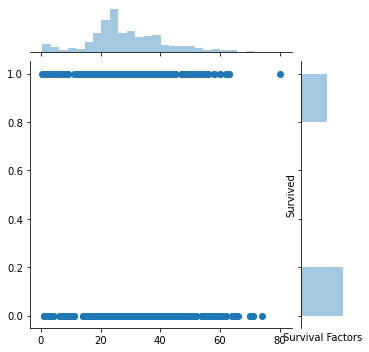

In [47]:
plt.figure(figsize=(5,5))
sns.jointplot(x=df['Age'].values, y=df['Survived'].values, height=5)  #comparing both columns
plt.ylabel('Survived')
plt.xlabel('Survival Factors')
plt.show()

<Figure size 360x360 with 0 Axes>

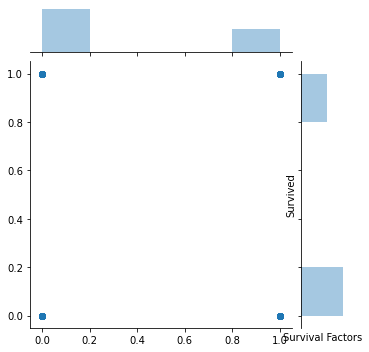

In [48]:
plt.figure(figsize=(5,5))
sns.jointplot(x=df['Sex'].values, y=df['Survived'].values, height=5)  #comparing both columns
plt.ylabel('Survived')
plt.xlabel('Survival Factors')
plt.show()

# Machine Learning Model<a id='5'></a>

### Doing our logistic regression

#### 1. For our dependent variable, use the column 'Survived' and look at the correlation to show the best numerical data to add to our model. 

In [50]:
Y = df["Survived"]

In [70]:
df.corr()["Survived"]

PassengerId      -0.005007
Survived          1.000000
Pclass           -0.338481
Sex               0.543351
Age              -0.058867
SibSp            -0.035322
Parch             0.081629
Fare              0.257307
Cabin_Survival    0.205840
1st_class         0.285904
2nd_class         0.093349
3rd_class        -0.322308
Name: Survived, dtype: float64

#### 2. For our LogReg, we can use all of the columns (after fixing them in the previous two parts) that contain numerical data. 
 - `['Age', 'Sibsp', 'Parch', 'Fare', 'Sex', '1st Class', '2nd Class', '3rd Class']`)

In [51]:
X = df[['Age', 'SibSp', 'Parch', 'Fare', 'Sex', '1st_class', '2nd_class', '3rd_class']] 

#### 3. Break data up into training/test data using `train_test_split` and use 25% as test data. We will then have four variables with data (e.g. `X_train`, `x_test`, `Y_train` and `Y_test`) 

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25)

#### 4. Create an instance of the `LogisticRegression` class.

In [53]:
logReg = LogisticRegression()

#### 5. Fit your logistic regression using the training data and that object from the previous bulletproof.

In [54]:
logReg.fit(x_train,y_train)

LogisticRegression()

#### 6. Once a logistic regression is fitted, use the `x_test` values to generate predicted values of Y. 
- Calculate the score as well. 

In [55]:
y_preg = logReg.predict(x_test)

In [72]:
y_preg

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0])

In [75]:
score = logReg.score(x_test.values, y_test.values)
score

0.8116591928251121

#### 7. Finally we use those predicted values of Y with the actual values of Y (`Y_test`) to generate a confusion matrix, a classification report, and the following metrics:
  - accuracy score
  - precision score
  - recall score

In [61]:
cnf_matrix = confusion_matrix(y_test, y_preg)
cnf_matrix

array([[121,  19],
       [ 23,  60]])

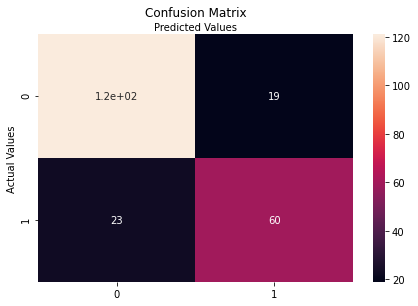

In [62]:
survival_rate = [0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(survival_rate))
plt.xticks(tick_marks, survival_rate)
plt.yticks(tick_marks, survival_rate)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

### Matrix Interpretation
- For value 0 (dead): My model made 23 wrong predictions and 1200 correct predictions. 
- For value 1 (alive): My model made 19 wrong and 60 correct predictions. 

In [66]:
print(classification_report(y_test, y_preg))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       140
           1       0.76      0.72      0.74        83

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223



In [67]:
print(f"Accuracy: {accuracy_score(y_test, y_preg)*100}")
print(f"Precision: {precision_score(y_test,y_preg)*100}")
print(f"Recall: {recall_score(y_test,y_preg)*100}")

Accuracy: 81.16591928251121
Precision: 75.9493670886076
Recall: 72.28915662650603


# Conclusion<a id='6'></a>

Upon analysis, cleaning and conversion of columns, I identified the following columns as possible contributing factors to the survival of a titanic passanger. I will attempt to explain the possible correlation:
- 'Age': As shown above, the correlation between survived and age is negative. As age increases, the lower chance a person has of survival.
- 'SibSp','Parch': Although the impact of these feautures is not as high, if a passanger was in the boat with someone else such as their siblings, parents this could of caused them to have a delay on their evacuation in comparison to someone that was alone. 
- 'Sex': Sex has a big impact on survival. Men were most likely evacuated last and women were most likely evacuated first. This means, if you knew the sex of a person you had a very good chance of prediction their survival outcome. 
- '1st_class','2nd_class','3rd_class': Third class passangers were located on the lower level of the titanic, this meant their floor was the first getting floaded. 1st class has the highest positive correlation because 1st class passangers were richer and thus most likely evacuated first. 
- 'Fare': Fare has a positive correlation between the highest amount a passanger pays, the most likely they will survive as they will be higher up in the tatanic, will have more time to be evacuated and will also be evacuated first. This directly supports the first, second and third class statement.  


In our logistic regression model, we tested the effect of these features against the survival and found that the coefficient of determination was 0.81. This might imply that these feautures are great predictions of who would have survived the titanic. 

In hopes to increase the accuracy of our prediction, we could try to find the values for the cabin column. Although this would take some time since we would have to look for this info in the titanic website, it could give us a better understanding of the were each passanger was located in the titanic. 